In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("mergedEARNINGS.csv")

df

,Unnamed: 0,Name,Rank,Race,Year,CaseID,TypeOfMisconduct,Allegation,Finding,Outcome,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,0,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,1,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,2,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,3,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,4,joseph abasciano,Police Officer,White,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,1,vladimir xavier,Police Officer,Black,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,Oral Reprimand,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8817,2,vladimir xavier,Police Officer,Black,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,NaN,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8818,0,anthony d ierardi,Sergeant,White,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,NaN,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
8819,0,robert m zingg,Detective,White,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,Counselling,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


In [3]:
df.drop_duplicates(subset=['Name', 'TypeOfMisconduct', 'Race', 'Rank', 'Allegation', 'Finding', 'Amount', 'Recipient'], keep='first', inplace=True)

df

,Unnamed: 0,Name,Rank,Race,Year,CaseID,TypeOfMisconduct,Allegation,Finding,Outcome,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,0,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,1,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,2,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,3,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,4,joseph abasciano,Police Officer,White,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,NaN,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,1,vladimir xavier,Police Officer,Black,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,Oral Reprimand,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8817,2,vladimir xavier,Police Officer,Black,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,NaN,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
8818,0,anthony d ierardi,Sergeant,White,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,NaN,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
8819,0,robert m zingg,Detective,White,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,Counselling,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


### Race

In [4]:
df['Race'].describe()

count      3971
unique        3
top       White
freq       3182
Name: Race, dtype: object

<AxesSubplot:ylabel='Race'>

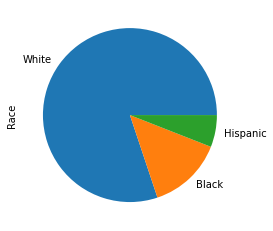

In [5]:
df['Race'].value_counts().plot(kind='pie')

### Amount Contributed

In [6]:
df['Amount'].describe()

count    3971.000000
mean      269.822065
std       204.683209
min       -19.750000
25%       100.000000
50%       250.000000
75%       300.000000
max      1000.000000
Name: Amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

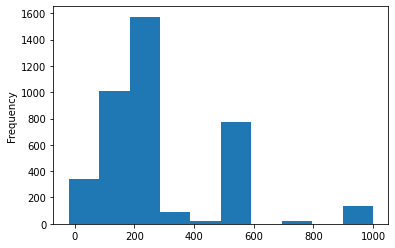

In [7]:
df['Amount'].plot(kind='hist')

### Rank

In [8]:
df['Rank'].describe()

count               3971
unique                 8
top       Police Officer
freq                2091
Name: Rank, dtype: object

<AxesSubplot:ylabel='Rank'>

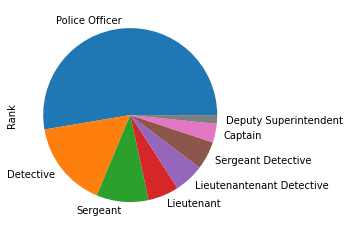

In [9]:
df['Rank'].value_counts().plot(kind='pie')

###  filtered by race

<AxesSubplot:ylabel='Frequency'>

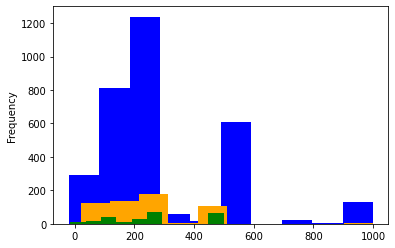

In [21]:
df_white = df.loc[df["Race"] == "White"]
df_white["Amount"].plot(kind = "hist", color = 'blue')

df_black = df.loc[df["Race"] == "Black"]
df_black["Amount"].plot(kind = "hist", color = 'orange')

df_hispanic= df.loc[df["Race"] == "Hispanic"]
df_hispanic["Amount"].plot(kind = "hist", color = 'green')


In [25]:
print("average amount of contribution for whites: ", df_white["Amount"].mean())
print("average amount of contribution for blacks: ", df_black["Amount"].mean())
print("average amount of contribution for hispanics: ", df_hispanic["Amount"].mean())

average amount of contribution for whites:  273.582972972973
average amount of contribution for blacks:  253.68354430379748
average amount of contribution for hispanics:  256.9296610169492


### Findings
From what we see from the averages and bar chart, white officers heavily dominate the Boston Police data we have, as we expected. However, the average amount of contributions appears to be consistent despite the race of the officer.